In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as time
import seaborn as sns
import scipy.stats
import joblib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#Loading Data Frame
df=pd.read_csv("[CLEANED]TravelPac Q2 2022.csv")
print(df.shape)
df2=df.head(9084).round()


(9084, 15)


In [230]:
#drop the column which is not necessary for the process
df2.head(9084)
df2.drop(['sample'],axis='columns').head(9084)

,Unnamed: 0,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,expend
0,0,2022,2,1,1,10,1,1,1,2,2,1217.0,4868.0,578038.0
1,1,2022,2,1,1,10,1,1,2,1,1,941.0,2822.0,188125.0
2,2,2022,2,1,1,10,1,1,2,1,2,6045.0,36510.0,4621624.0
3,3,2022,2,1,1,10,1,1,2,2,1,1102.0,3307.0,220465.0
4,4,2022,2,1,1,10,1,1,2,2,2,4354.0,17415.0,1158992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9079,9079,2022,2,2,3,90,4,1,4,2,2,926.0,9258.0,370303.0
9080,9080,2022,2,2,3,90,4,1,6,1,2,926.0,5555.0,138863.0
9081,9081,2022,2,2,3,90,4,1,6,1,3,1061.0,16982.0,1040144.0
9082,9082,2022,2,2,3,90,4,1,6,2,4,1299.0,48071.0,129921.0


In [238]:
np.unique(df2['Age'].values)

array([1, 2, 3, 4, 5, 6, 7, 9], dtype=int64)

In [239]:
X = df2.head(9084)[TO_USE].values
y = df2.head(9084)['Age'].apply(lambda x: x=='1').astype(int).values

In [240]:
df2.head(9084)['Age'].value_counts()

3    1809
4    1723
5    1568
6    1322
2    1052
7     956
9     345
1     309
Name: Age, dtype: int64

In [242]:
df2.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9084.0,4542.0,2622.0,0.0,2271.0,4542.0,6812.0,9083.0
Year,9084.0,2022.0,0.0,2022.0,2022.0,2022.0,2022.0,2022.0
quarter,9084.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
ukos,9084.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
mode,9084.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
country,9084.0,43.0,24.0,10.0,23.0,35.0,62.0,92.0
purpose,9084.0,3.0,2.0,1.0,1.0,2.0,4.0,6.0
package,9084.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
Age,9084.0,4.0,2.0,1.0,3.0,4.0,6.0,9.0
Sex,9084.0,1.0,1.0,0.0,1.0,1.0,2.0,9.0


Text(0.5, 1.05, 'Scatterplot and histogram of pairs of variables color coded by Age')

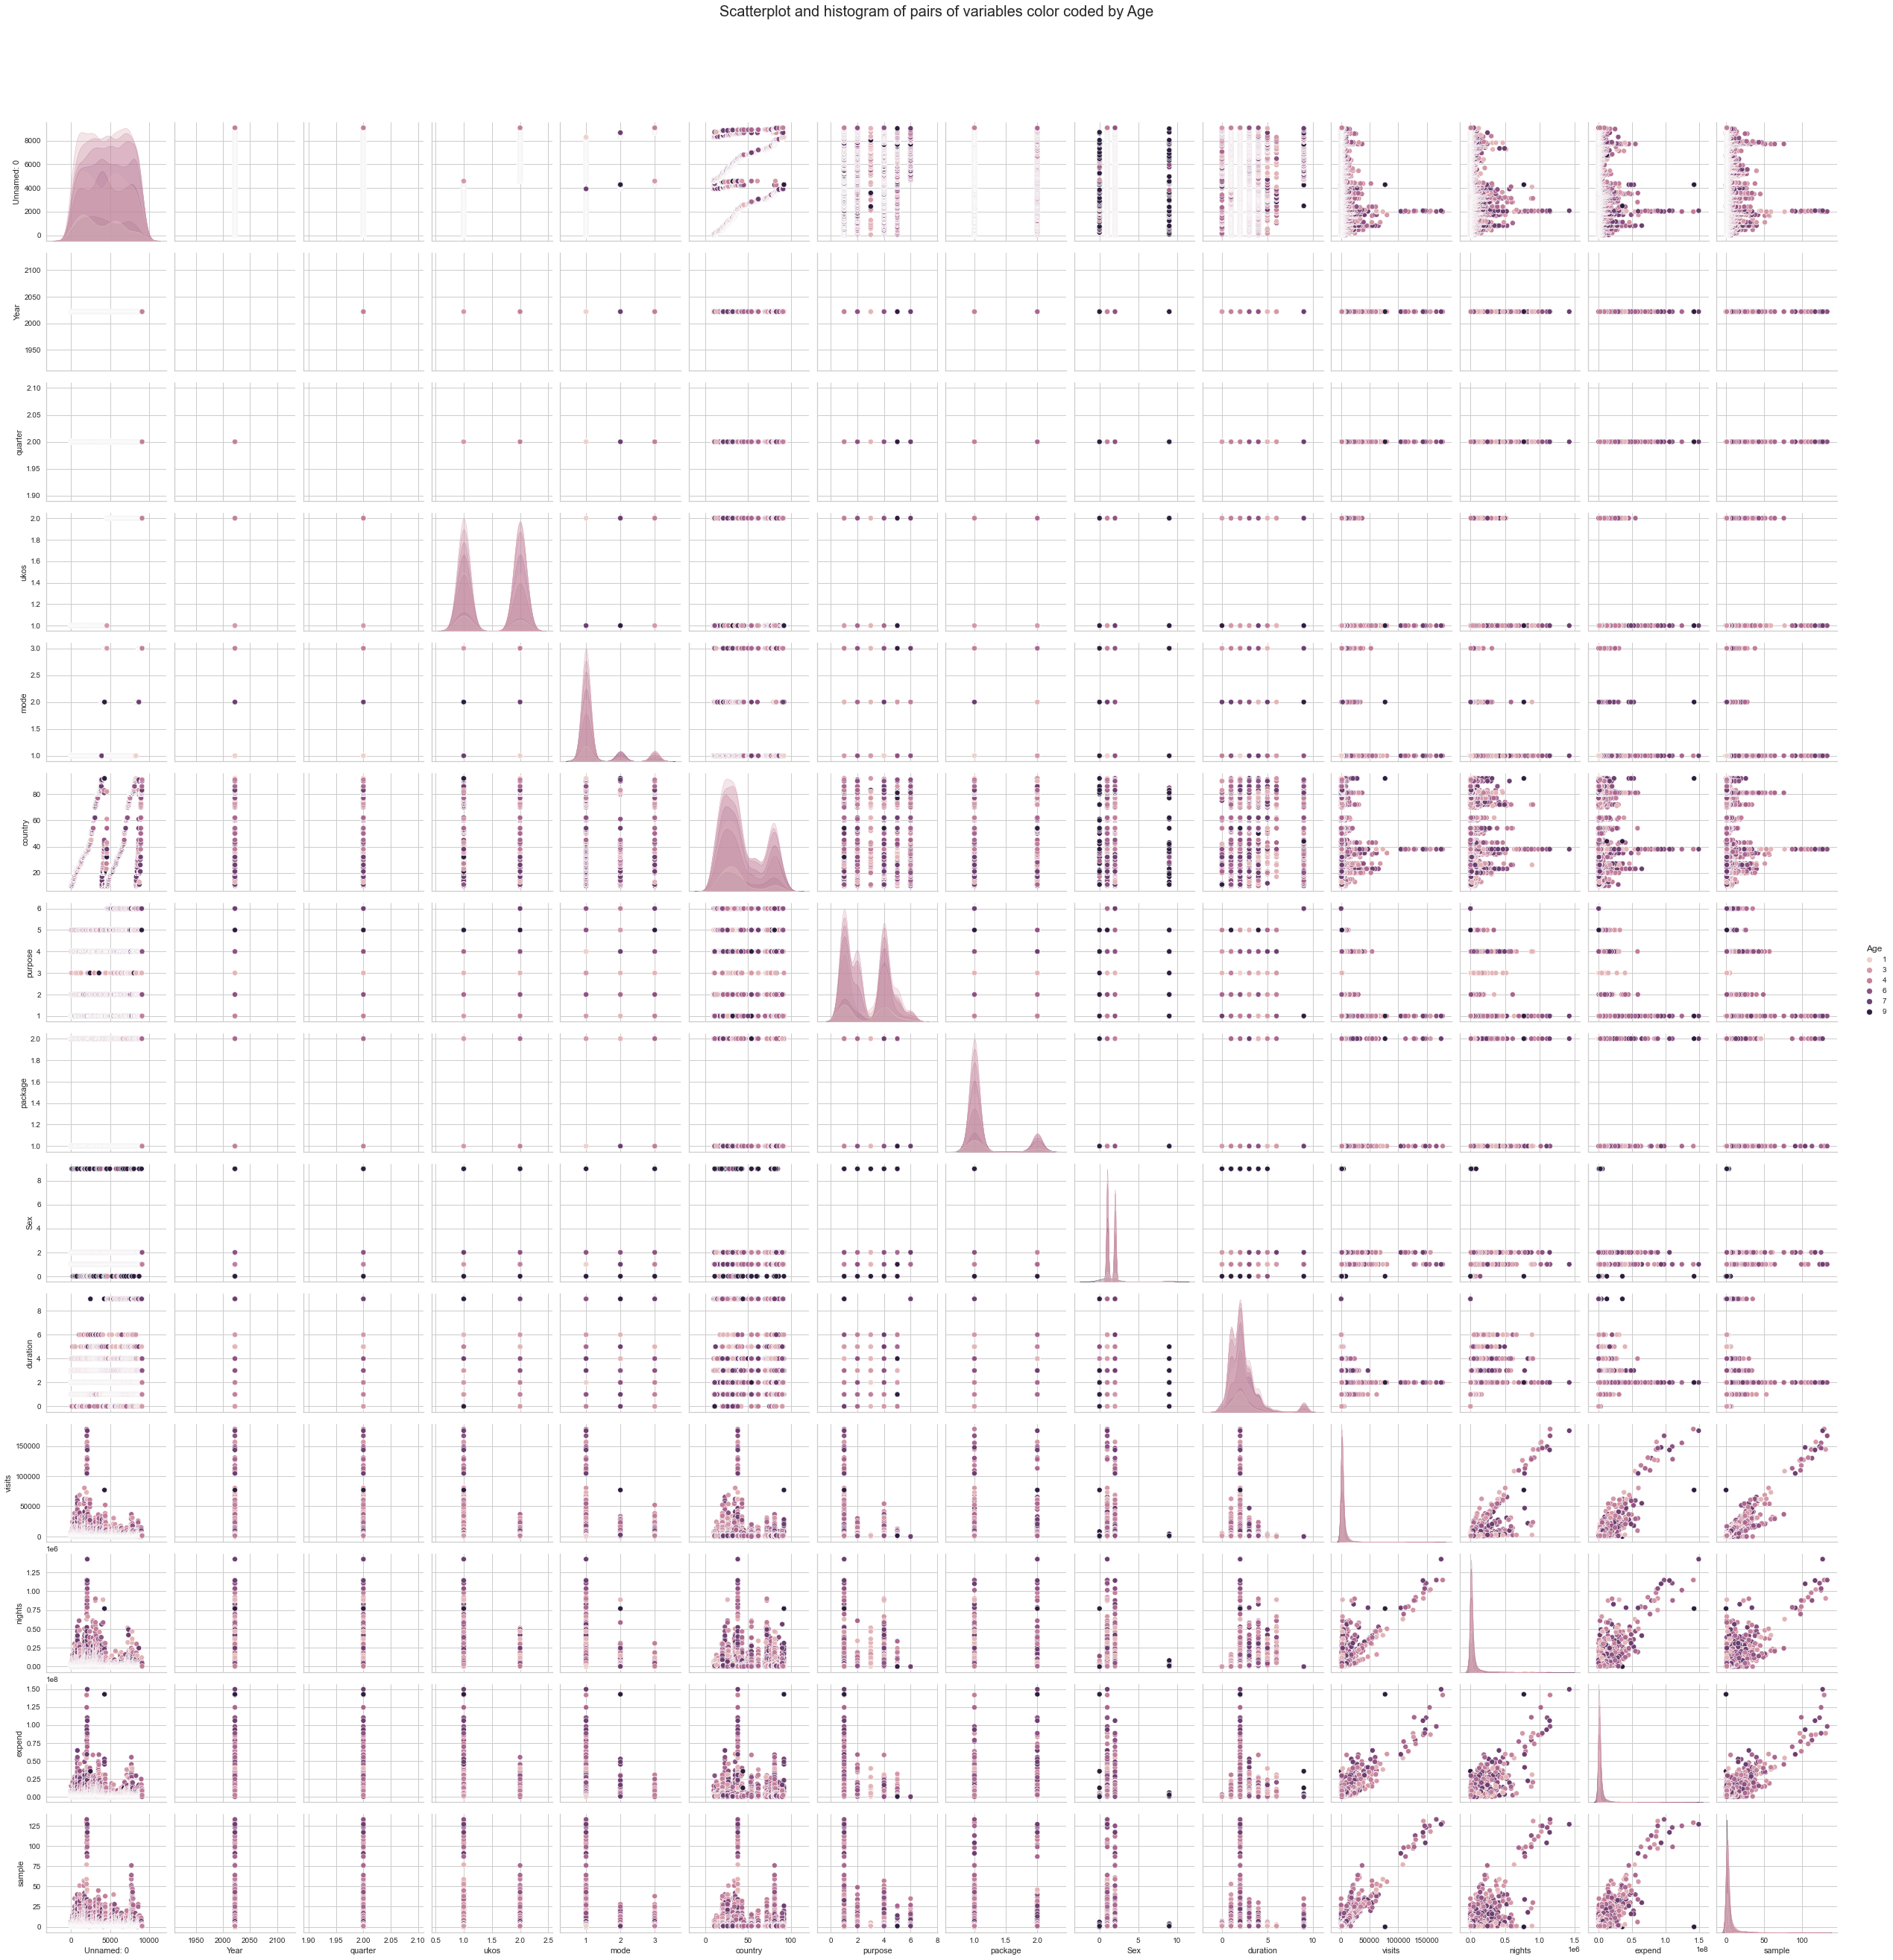

In [202]:
g=sns.pairplot(df2, hue='Age')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by Age",fontsize = 20,y=1.05)

In [255]:
df2['Sex'].unique()

array([2, 1, 9, 0], dtype=int64)

In [256]:
X = df2.drop(['Sex'],axis=1)
y =df2['Sex']

In [257]:
from sklearn.model_selection import train_test_split
SEED=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [258]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7267, 14), (1817, 14), (7267,), (1817,))

In [259]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3,max_depth=2,random_state=SEED)

In [260]:
#Fit RandomForestClassifier
rfc.fit(X_train, y_train)
#Predict the test set labels
y_pred =rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


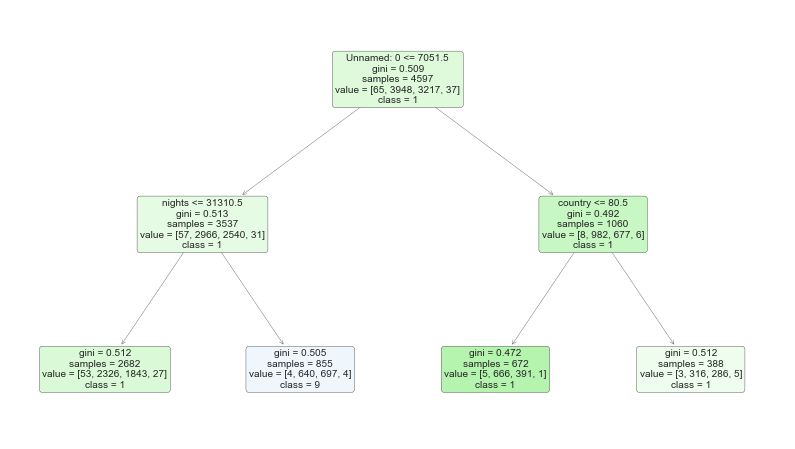

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


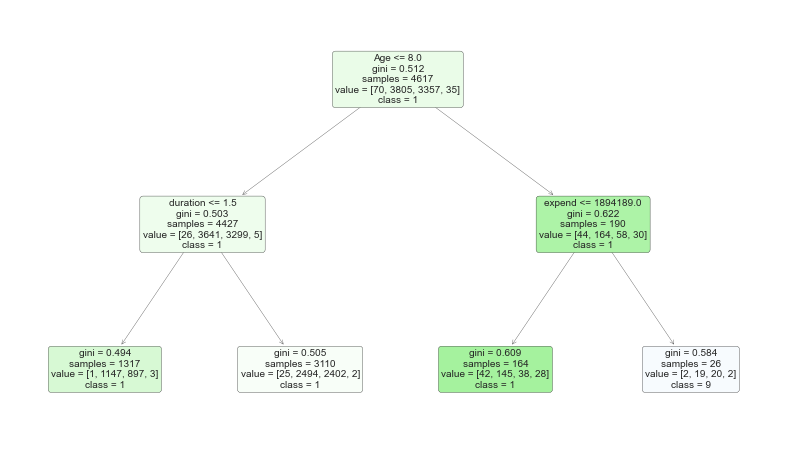

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


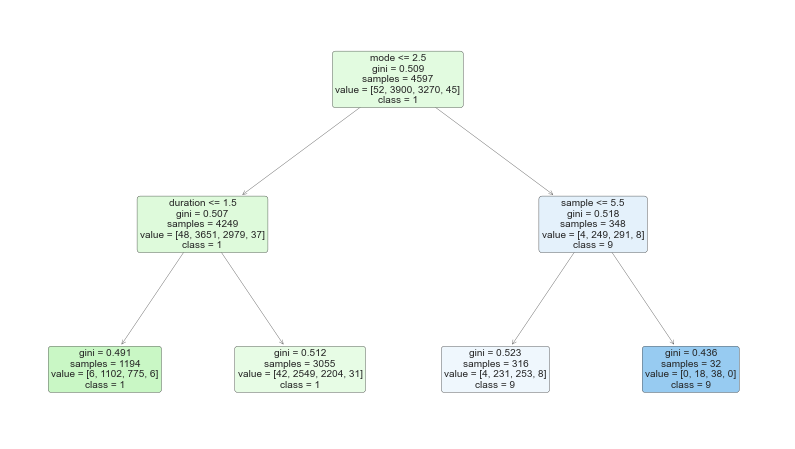

In [262]:
from sklearn import tree
 
features = X.columns.values #name of each columns
classes = ['2','1','9','0'] #The name of each class

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(14,8))
    tree.plot_tree(estimator,feature_names=features,class_names=classes,fontsize=10,filled=True,rounded=True)
    plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.54      0.99      0.70       983
           2       0.53      0.01      0.02       806
           9       0.00      0.00      0.00        13

    accuracy                           0.54      1817
   macro avg       0.27      0.25      0.18      1817
weighted avg       0.53      0.54      0.39      1817



C:\Users\Dhanush\.VirtualBox\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanush\.VirtualBox\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhanush\.VirtualBox\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


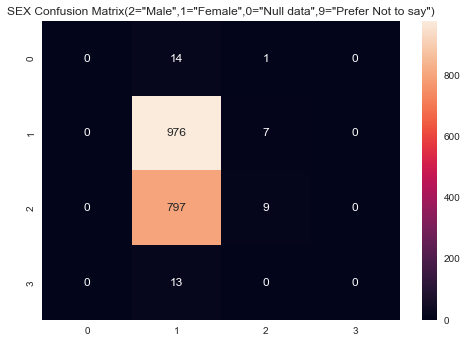

In [263]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('SEX Confusion Matrix(2="Male",1="Female",0="Null data",9="Prefer Not to say")')
print(classification_report(y_test,y_pred))

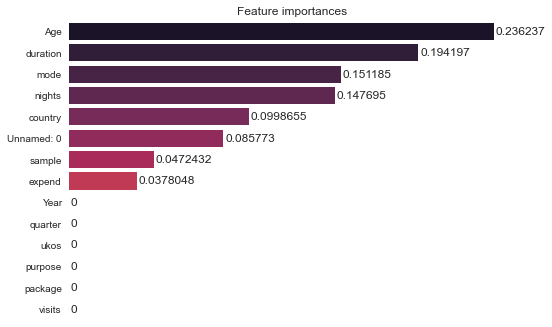

In [264]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [ ]:
#Plottings and operations
